In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Create a set of random latitude and longtitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-90.000, 90.000, size=1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [6]:
coordinates = list(lats_lngs)

In [4]:
from citipy import citipy

In [7]:
# Create a list for holding cities.
cities = []

# Identify the nearest city for each latitude and longtitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

599

In [10]:
# import the requests liblary
import requests

# Import the API key
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [19]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [20]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [22]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 59.04,
  'feels_like': 58.41,
  'temp_min': 53.94,
  'temp_max': 63.93,
  'pressure': 1012,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 40},
 'clouds': {'all': 75},
 'dt': 1715901500,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1715851286,
  'sunset': 1715904001},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [32]:
city_weather.json()['weather'][0]['icon']

'04d'

In [33]:
# Import the time library and the datetime module from the datetime liblary
import time 
from datetime import datetime

In [34]:
# Create and empty list to hold the weather data.
city_data =[]

# Print the beggining of the logging
print('Beginning Data Retrieval ')
print('-------------------------')

# Create counter 
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval 
-------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | veraval
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | saraipali
Processing Record 12 of Set 1 | raga
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | adre
Processing Record 21 of Set 

Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | parry sound
Processing Record 40 of Set 4 | bolshaya dzhalga
Processing Record 41 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 4 | san rafael
Processing Record 43 of Set 4 | am timan
Processing Record 44 of Set 4 | jumla
Processing Record 45 of Set 4 | kyabe
Processing Record 46 of Set 4 | gazli
Processing Record 47 of Set 4 | bauru
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | shahrud
Processing Record 50 of Set 4 | saint-augustin
Processing Record 1 of Set 5 | kajaani
Processing Record 2 of Set 5 | tornio
Processing Record 3 of Set 5 | presidencia roque saenz pena
Processing Record 4 of Set 5 | vilhena
Processing Record 5 of Set 5 | aflu
City not found. Skipping...
Processing Record 6 of Set 5 | penalva
Processing Record 7 of Set 5 | goure
Processing Record 8 of Set 5 | sorvag
City not found. Skipping...
Processing Record 9 of Set 5 | carnarvon
Processi

City not found. Skipping...
Processing Record 34 of Set 8 | corinto
Processing Record 35 of Set 8 | donskoye
Processing Record 36 of Set 8 | jucurutu
Processing Record 37 of Set 8 | taltal
Processing Record 38 of Set 8 | vychegodskiy
Processing Record 39 of Set 8 | santa marinella
Processing Record 40 of Set 8 | nassjo
Processing Record 41 of Set 8 | holland
Processing Record 42 of Set 8 | saint-denis
Processing Record 43 of Set 8 | atar
Processing Record 44 of Set 8 | aswan
Processing Record 45 of Set 8 | jalu
Processing Record 46 of Set 8 | vastervik
City not found. Skipping...
Processing Record 47 of Set 8 | tawkar
City not found. Skipping...
Processing Record 48 of Set 8 | bagan
Processing Record 49 of Set 8 | ustye
Processing Record 50 of Set 8 | areia branca
Processing Record 1 of Set 9 | yabrud
Processing Record 2 of Set 9 | tirumullaivasal
Processing Record 3 of Set 9 | polovinnoye
Processing Record 4 of Set 9 | temir
Processing Record 5 of Set 9 | amalapuram
Processing Record 

Processing Record 19 of Set 12 | chimbote
Processing Record 20 of Set 12 | san-pedro
Processing Record 21 of Set 12 | povenets
Processing Record 22 of Set 12 | southend-on-sea
Processing Record 23 of Set 12 | vargem alta
Processing Record 24 of Set 12 | nsanje
Processing Record 25 of Set 12 | yaounde
Processing Record 26 of Set 12 | nyandoma
Processing Record 27 of Set 12 | moron
Processing Record 28 of Set 12 | joensuu
Processing Record 29 of Set 12 | kabinda
Processing Record 30 of Set 12 | birao
Processing Record 31 of Set 12 | misratah
Processing Record 32 of Set 12 | boyuibe
Processing Record 33 of Set 12 | bhadrachalam
Processing Record 34 of Set 12 | gamba
Processing Record 35 of Set 12 | antalaha
Processing Record 36 of Set 12 | sensuntepeque
Processing Record 37 of Set 12 | coquimbo
Processing Record 38 of Set 12 | medeiros neto
Processing Record 39 of Set 12 | caraballeda
Processing Record 40 of Set 12 | burica
City not found. Skipping...
Processing Record 41 of Set 12 | nuri

In [35]:
len(city_data)

558

In [36]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,58.17,86,40,3.00,ZA,2024-05-16 23:45:50
1,Qaanaaq,77.4840,-69.3632,23.86,75,100,4.43,GL,2024-05-16 23:45:50
2,Arraial Do Cabo,-22.9661,-42.0278,74.82,88,100,21.81,BR,2024-05-16 23:45:50
3,Veraval,20.9000,70.3667,82.63,79,13,15.59,IN,2024-05-16 23:45:50
4,Cape Town,-33.9258,18.4232,66.38,85,0,5.75,ZA,2024-05-16 23:41:09
...,...,...,...,...,...,...,...,...,...
553,Abaza,52.6550,90.0928,43.72,81,37,0.65,RU,2024-05-16 23:58:41
554,Amapa,1.0000,-52.0000,74.35,98,100,2.35,BR,2024-05-16 23:58:41
555,Poddorye,57.4695,31.1156,54.90,76,86,4.85,RU,2024-05-16 23:58:42
556,Waddan,29.1614,16.1390,90.45,11,74,16.26,LY,2024-05-16 23:58:42


In [37]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2024-05-16 23:45:50,-33.5906,26.8910,58.17,86,40,3.00
1,Qaanaaq,GL,2024-05-16 23:45:50,77.4840,-69.3632,23.86,75,100,4.43
2,Arraial Do Cabo,BR,2024-05-16 23:45:50,-22.9661,-42.0278,74.82,88,100,21.81
3,Veraval,IN,2024-05-16 23:45:50,20.9000,70.3667,82.63,79,13,15.59
4,Cape Town,ZA,2024-05-16 23:41:09,-33.9258,18.4232,66.38,85,0,5.75
...,...,...,...,...,...,...,...,...,...
553,Abaza,RU,2024-05-16 23:58:41,52.6550,90.0928,43.72,81,37,0.65
554,Amapa,BR,2024-05-16 23:58:41,1.0000,-52.0000,74.35,98,100,2.35
555,Poddorye,RU,2024-05-16 23:58:42,57.4695,31.1156,54.90,76,86,4.85
556,Waddan,LY,2024-05-16 23:58:42,29.1614,16.1390,90.45,11,74,16.26


In [38]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [39]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2024-05-16 23:45:50,-33.5906,26.8910,58.17,86,40,3.00
1,Qaanaaq,GL,2024-05-16 23:45:50,77.4840,-69.3632,23.86,75,100,4.43
2,Arraial Do Cabo,BR,2024-05-16 23:45:50,-22.9661,-42.0278,74.82,88,100,21.81
3,Veraval,IN,2024-05-16 23:45:50,20.9000,70.3667,82.63,79,13,15.59
4,Cape Town,ZA,2024-05-16 23:41:09,-33.9258,18.4232,66.38,85,0,5.75
...,...,...,...,...,...,...,...,...,...
553,Abaza,RU,2024-05-16 23:58:41,52.6550,90.0928,43.72,81,37,0.65
554,Amapa,BR,2024-05-16 23:58:41,1.0000,-52.0000,74.35,98,100,2.35
555,Poddorye,RU,2024-05-16 23:58:42,57.4695,31.1156,54.90,76,86,4.85
556,Waddan,LY,2024-05-16 23:58:42,29.1614,16.1390,90.45,11,74,16.26


In [40]:
# Extract the relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

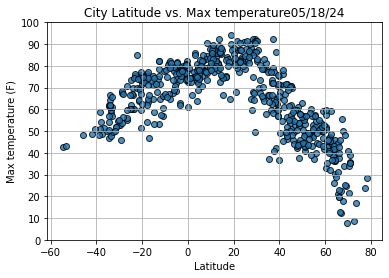

In [50]:
# Import time module
import time

# Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolors='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max temperature' + time.strftime('%x'))
plt.ylabel('Max temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.yticks(np.arange(0,110, step=10))

# Save the fig
plt.savefig('weather_data/fig1.png')

# Show the plot.
plt.show()

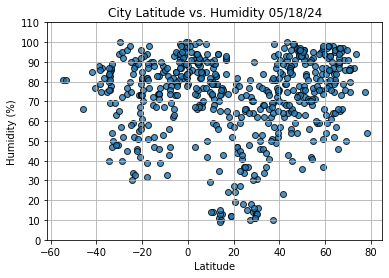

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(0,120, step=10))

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

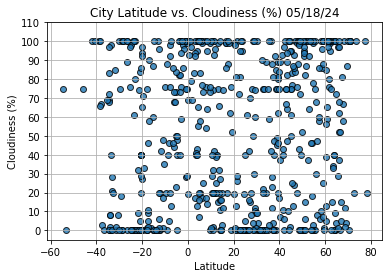

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(0,120, step=10))

# Save the figure.

plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


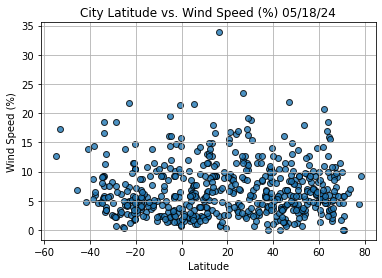

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (%) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
#plt.yticks(np.arange(0,120, step=10))

# Save the figure.

plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [70]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    #plt.yticks(np.arange(0,110, step=10))
    plt.show()

In [71]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

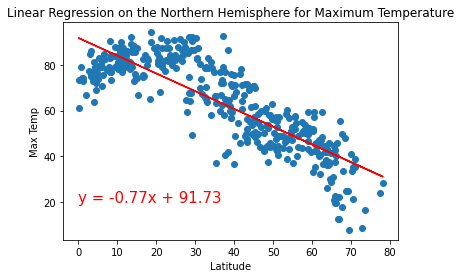

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,20))

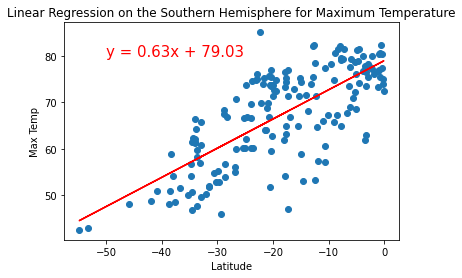

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' \
                        ' for Maximum Temperature', 'Max Temp',(-50,80))

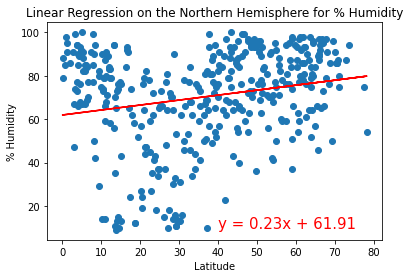

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' \
                        ' for % Humidity', '% Humidity',(40,10))

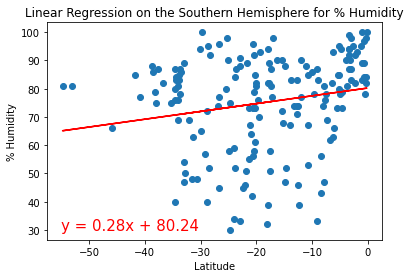

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' \
                        ' for % Humidity', '% Humidity',(-55,30))

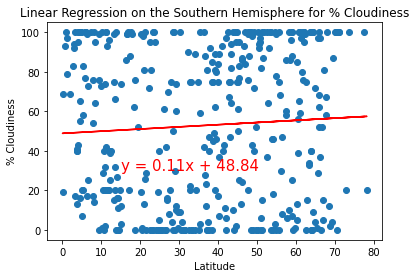

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' \
                        ' for % Cloudiness', '% Cloudiness',(15,30))

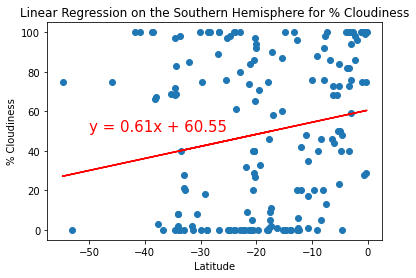

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' \
                        ' for % Cloudiness', '% Cloudiness',(-50,50))

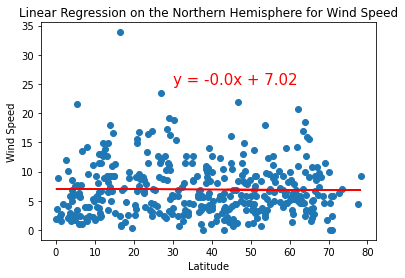

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' \
                        ' for Wind Speed', 'Wind Speed',(30,25))

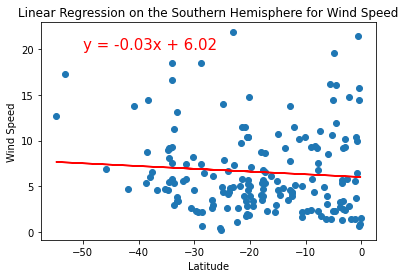

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' \
                        ' for Wind Speed', 'Wind Speed',(-50,20))